<a href="https://colab.research.google.com/github/zrshen/ML_Colab/blob/main/sl_housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Read in our dataframe to memory
df = pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# Always do this - basic overview
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [ ]:
# Always do this - more in depth look at columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Let's do some basic data analysis to get familiar with the data. For instance,
1. Get an idea of statistics on various features.
2. Understand the correlation of various features. 
3. Are there any outliers in the dataset? If so, how can we fix this?
4. How to test for multi-collinearity? What features should we eliminate based on this test?

Which of these steps should be run on training data? 

Write code to split the data into train and test.

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test (20%)
train, test = train_test_split(df, test_size=0.2)

# Save for convenience
train.to_csv('train_data.csv')
test.to_csv('test_data.csv')

Write code to get a summary of all the features that are present in the dataset

In [ ]:
# Always do this - get a look at possible null/nan values
np.sum(df.isnull())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
# Summary statistics
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

Let's write code for correlation of response variable with all the other variables. Which feature is most correlated with the response variable? (what is the response variable in this case?)

The response variable, aka the target variable or Y variable, is the variable we are trying to predict. Here, it's "median_house_value".

In [ ]:
# Create correlation matrix
corr_matrix = train.corr()

# See correlation with target variable
corr_matrix['median_house_value'].sort_values(ascending=False)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.693288
total_rooms           0.135418
housing_median_age    0.113331
households            0.062662
total_bedrooms        0.047840
population           -0.026217
longitude            -0.040438
latitude             -0.148780
Name: median_house_value, dtype: float64

In [ ]:
# Correlation matrix visualization
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

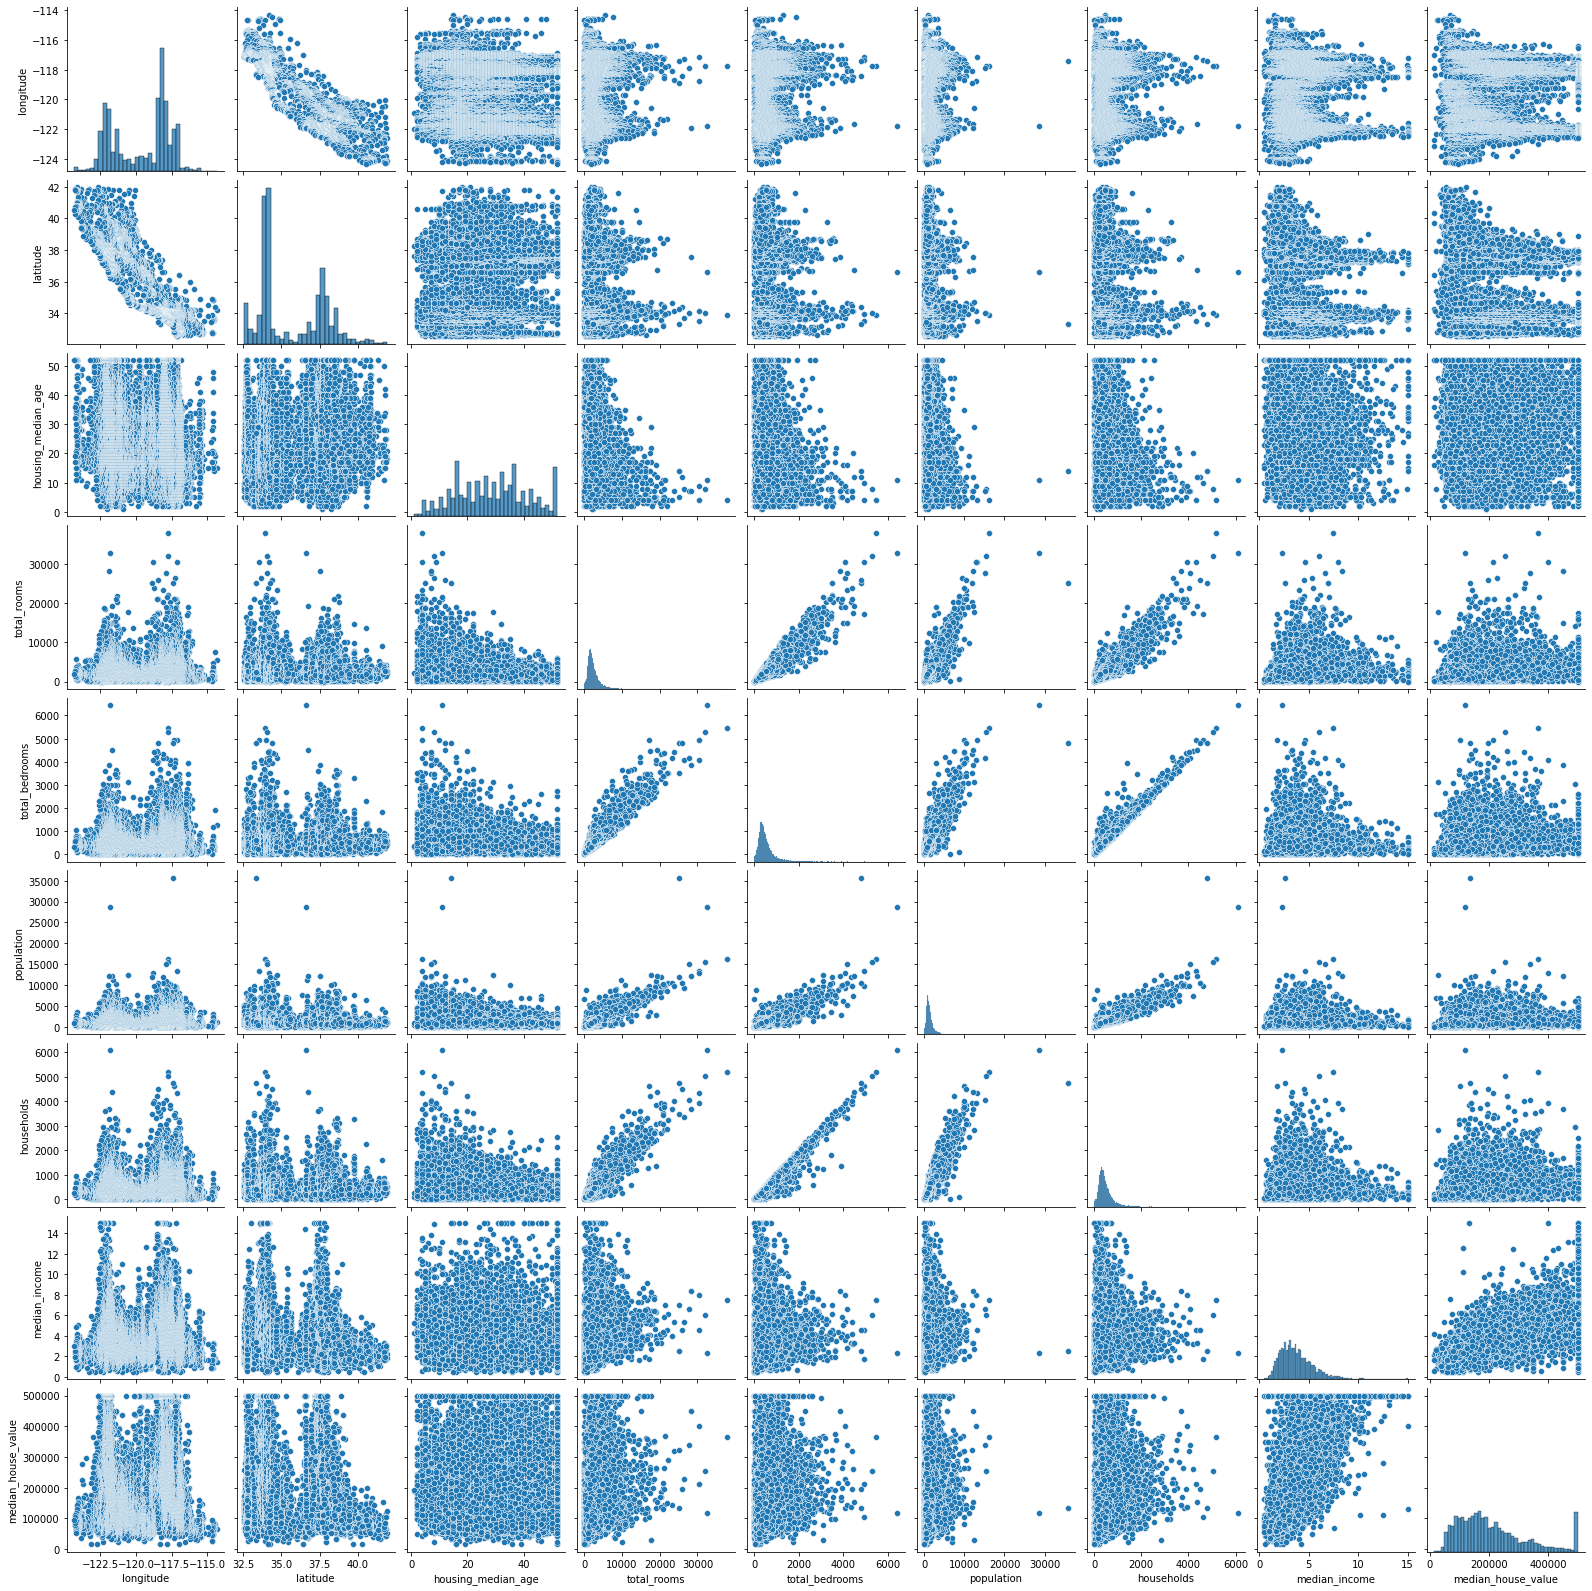

In [ ]:
# Correlations with datapoint level detail - not recommeded for very large datasets. may be computationally expensive
sns.pairplot(df)

Test for outliers and remove them.

Note 1: Removing data is not ideal. Other strategies to deal with outliers
can be data imputation, deep dives on accuracy of measurement among others.

Note 2: Whatever transformations are being applied on the training data 
must also be applied on test data. Therefore, the parameters learnt 
over training data must be retained for prediction over test data.

In [ ]:
# Variables to store out bounds by column name
upper_bounds = {}
lower_bounds = {}

# Best practice
train_copy = train.copy()

for c in train_copy.columns:
    # Take inner quartile boundary values
    q25, q75 = np.percentile(train_copy[c], [25, 75])
    intr_qr = q75 - q25
  
    # Set upper/lower bounds (arbitrary)
    upper = q75 + 1.5 * intr_qr
    lower = q25 - 1.5 * intr_qr

    # Store bounds
    upper_bounds[c] = upper
    lower_bounds[c] = lower
    
    # Logical AND on each column - eliminate any row that doesn't fit within the required bounds
    train_copy = train_copy[(train_copy[c] >= lower) & (train_copy[c] <= upper)].reset_index(drop=True)

train_copy.shape

(11090, 9)

In [ ]:
# Reassign training data to original variable
train = train_copy.copy()

Let's enumerate all the features and the target variable so that
we have a feature matrix (train_X) and a response variable (train_Y).

In [ ]:
# Designate "X" and "Y" columns
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = ['median_house_value']

In [ ]:
# Slice combined dataframe into X and Y dataframes
train_X = train[features]
train_Y = train[target]

**Dealing with multi-collinearity**

A common tool to detect multi-collinearity is variance inflation factor (VIF). 
VIF of a variable can be computed by regressing the variable againt all other
variables and then computing the 1 / (1 - R^2). If this value is larger than
5 (a rule of thumb with no strong theoretical justification) then that
variable can be eliminated.


*Question: Why correlation matrix is not enough?*

Sometimes, there are correlation issues that go deeper than 1:1 columns. More complex correlation can occur between multiple variables, causing an issue that's harder to detect. That's why we'll look for VIF next.

In [ ]:
def multicollinearity_by_vif(X, vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Go through each column
    for i in range(len(X.columns)):

        # View which columns are left
        print(f"Columns remaining at iteration {i}: {X.columns}")

        # Calculate VIF
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s = pd.Series(index=X.columns, data=l).sort_values(ascending=False)
        
        # If VIF is above our threshold, eliminate the column with the highest VIF
        if s.iloc[0] > vif:
            X.drop(s.index[0],  axis=1, inplace=True)
            print('Removed: ', s.index[0],', VIF: ', s.iloc[0])
        else:
            break

In [ ]:
# Best practice
x_copy = train_X.copy()

In [ ]:
# Use our function
multicollinearity_by_vif(x_copy)
train_X = x_copy.copy()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Columns remaining at iteration 0: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
Removed:  longitude , VIF:  692.8862954122978
Columns remaining at iteration 1: Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'],
      dtype='object')
Removed:  households , VIF:  125.84233184751321
Columns remaining at iteration 2: Index(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'median_income'],
      dtype='object')
Removed:  total_bedrooms , VIF:  45.09829666775698
Columns remaining at iteration 3: Index(['latitude', 'housing_median_age', 'total_rooms', 'population',
       'median_income'],
      dtype='object')
Removed:  latitude , VIF:  19.23898303809385
Columns remaining at iteration 4: Index(['housing_median_age', 'total_rooms', 'population', 'median_income'], d

Now, fit a linear regression model using k-fold cross-validation for model 
selection. We will use [linear_model](https://scikit-learn.org/stable/modules/linear_model.html#) sklearn library to train our models.

We can use [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html#) with multiple scoring metrics such as
MSE, R2, etc. 



In [ ]:
# Part 1: Use R2 as scoring. Interpret the score.

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, train_X, train_Y, cv=5, scoring='r2')
print('R2: ', np.sqrt(scores).mean())

R2:  0.6733978613843712


R^2 is the "Correlation Coefficient". Conceptually, it can be interpreted as "R^2 % of the variation we observe in the target variable can be explained by the variation in our feature variables".



In [ ]:
# Part 2: Use RMSE as scoring. Interpret the score.

lr = LinearRegression()
scores = cross_val_score(lr, train_X, train_Y, cv=5, scoring='neg_mean_squared_error')
print('RMSE: ', np.sqrt(-scores).mean())

RMSE:  68306.91372076116


RMSE is the "Root Mean Squared Error". Note that linear regresstion is also called "Least Squares Regression" because the objective is to minimize the squared sum of the residuals. Here, we are using the Square Root of that measurement to evaluate our model during training.

Regularization or Shrinkage Methods

In [ ]:
# Part 1: Ridge regression. Recall that ridge regression penalizes model complexity by adding the L2 norm (squared sum) of the weight vector to the loss function.
# Conceptually, this serves to "tame" but not "eliminate" the contribution of features, across the board.
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

scores = cross_val_score(ridge, train_X, train_Y, cv=5, scoring='r2')
print('R2: ', np.sqrt(scores).mean())

R2:  0.6733978627783659


In [ ]:
# Part 2: Lasso regression. Recall that ridge regression penalizes model complexity by adding the L1 norm (absolute sum) of the weight vector to the loss function.
# Conceptualy, this serves to "eliminate" some of the features more readily than ridge, rather than "tame" their weights across the board.
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

scores = cross_val_score(lasso, train_X, train_Y, cv=5, scoring='r2')
print('R2: ', np.sqrt(scores).mean())

R2:  0.6733978616326957


Parameter selection using Cross validation.

Next we will use cross valiation to select the parameters for Ridge regression. Note that the parameter in question is the weight applied to the norm
of the weight vector. This parameter controls the variance-bias trade off.

Task: vary the parameter (alpha) over a range of values and plot train val error to find the optimal value for Ridge regression. Use RMSE as the scoring metric.

In [ ]:
from sklearn.model_selection import validation_curve

# Set up model, parameter, and ranges to test
ridge = Ridge(random_state=42)
param_name = 'alpha'
param_range = [0, 0.1, 1, 10, 50, 100, 200, 300, 500, 700, 1000]
scoring = 'neg_mean_squared_error'

# Evaluate the model
scores = validation_curve(ridge, 
                          train_X, 
                          train_Y,
                          scoring=scoring, 
                          cv=5, 
                          param_name=param_name,
                          param_range=param_range)

# Store outputs for easy visualization
train_score=[np.sqrt(-scores[0][i].mean()) for i in range(len(param_range))]
test_score=[np.sqrt(-scores[1][i].mean()) for i in range(len(param_range))]

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score,label='Train')
plt.plot(param_range,test_score,label='Test')
plt.xticks=param_range
plt.title("Validation curve of {}".format(param_name),size=12)
plt.legend()

**Based on CV what can we conclude about the parameter? Is the linear regression overfitting the data?**

Given that the test error is always greater than training error, academically speaking we'd say yes. However, the difference is not that large, so it may not be an issue. This is a great example of a situation that depends on the data, problem space, etc. If you encounter this is the future, it'll require more analysis for what is an "acceptable" amount of overfitting.

**Let's evaluate the model on test data. Remember to apply the same transformations that were applied on the train data.**

In [ ]:
# Instantiate a new Linear Regression and fit on our preprocessed training data
lr = LinearRegression()
lr.fit(train_X, train_Y)

LinearRegression()

In [ ]:
# Collect the names of all columns we didn't eliminate, including the target
l = list(train_X.columns)
l.extend(target)

In [ ]:
# Eliminate columns from test that we eliminated in training data. Important for predictive parity
features_used = list(train_X.columns)
features_used.extend(target)
test_copy = test.copy()
test_copy = test_copy[features_used]

In [ ]:
# Remove outliers based on parameters that were set on training data.
for c in test_copy.columns:
    test_copy = test_copy[(test_copy[c] >= lower_bounds[c]) & (test_copy[c] <= upper_bounds[c])].reset_index(drop=True)

In [ ]:
# Split X and Y for test data
test_X = test_copy[train_X.columns]
test_Y = test_copy[target]

In [ ]:
# Calculate train/test error to compare
train_mse = mean_squared_error(train_Y, lr.predict(train_X))
train_rmse = np.sqrt(train_mse)
print('train error:', train_rmse)

y_pred = lr.predict(test_X)
test_mse=mean_squared_error(y_pred, test_Y)
test_rmse=np.sqrt(test_mse)
print('test error:',test_rmse)

train error: 68296.80256002191
test error: 69568.29807573878


**Looks** like our test error is better than training error. This is a great sign - our model generalizes well.

What can we do differently? So far we have used the features that were provided to us in the raw data. At this point, one might consider doing feature transformation and/or feature engineering to improve model performance. To that end,
can we think of some feature transformation or new features that can lead to a better model?

Let's define the following features:
1. rooms per household as the ratio of total rooms to households
2. bedrooms per total rooms as the ratio of bedrooms to all rooms in the house
3. population per household as ratio of total population to household

In [ ]:
# View all columns
df.columns

In [ ]:
# Create engineered features according to what we defined earlier
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

Repeat the entire exercise with these derived features and report
the performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test (20%)
train, test = train_test_split(df, test_size=0.2)

# Save for convenience
train.to_csv('train_data_extended.csv')
test.to_csv('test_data_extended.csv')

Write code to get a summary of all the features that are present in the dataset

In [ ]:
# Always do this - get a look at possible null/nan values
np.sum(df.isnull())

Write code for correlation of response variable with all the other variables. Which feature is most correlated with the response variable? (what is the response variable in this case?)

In [ ]:
# Create correlation matrix
corr_matrix = train.corr()

# See correlation with target variable
corr_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
# Variables to store out bounds by column name
upper_bounds = {}
lower_bounds = {}

# Best practice
train_copy = train.copy()

for c in train_copy.columns:
    # Take inner quartile boundary values
    q25, q75 = np.percentile(train_copy[c], [25, 75])
    intr_qr = q75 - q25
  
    # Set upper/lower bounds (arbitrary)
    upper = q75 + 1.5 * intr_qr
    lower = q25 - 1.5 * intr_qr

    # Store bounds
    upper_bounds[c] = upper
    lower_bounds[c] = lower
    
    # Logical AND on each column - eliminate any row that doesn't fit within the required bounds
    train_copy = train_copy[(train_copy[c] >= lower) & (train_copy[c] <= upper)].reset_index(drop=True)

print(train_copy.shape)
train = train_copy.copy()

Let's enumerate all the features and the target variable so that
we have a feature matrix (train_X) and a response variable (train_Y).

In [ ]:
# Designate "X" and "Y" columns
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']
target = ['median_house_value']

In [ ]:
# Slice combined dataframe into X and Y dataframes
train_X = train[features]
train_Y = train[target]

Dealing with multi-collinearity

A common tool to detect multi-collinearity is variance inflation factor (VIF). 
VIF of a variable can be computed by regressing the variable againt all other
variables and then computing the 1 / (1 - R^2). If this value is larger than
5 (a rule of thumb with no strong theoretical justification) then that
variable can be eliminated.


Question: Why correlation matrix is not enough?


In [ ]:
def multicollinearity_by_vif(X, vif=10):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Go through each column
    for i in range(len(X.columns)):

        # View which columns are left
        print(f"Columns remaining at iteration {i}: {X.columns}")

        # Calculate VIF
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s = pd.Series(index=X.columns, data=l).sort_values(ascending=False)
        
        # If VIF is above our threshold, eliminate the column with the highest VIF
        if s.iloc[0] > vif:
            X.drop(s.index[0],  axis=1, inplace=True)
            print('Removed: ', s.index[0],', VIF: ', s.iloc[0])
        else:
            break

In [ ]:
# Use our function
multicollinearity_by_vif(train_X)

Now, fit a linear regression model using k-fold cross-validation for model 
selection. We will use [linear_model](https://scikit-learn.org/stable/modules/linear_model.html#) sklearn library to train our models.

We can use [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html#) with multiple scoring metrics such as
MSE, R2, etc. 



In [ ]:
# See remaining columns
train_X.columns

In [ ]:
# Part 1: Use R2 as scoring. Interpret the score.

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, train_X, train_Y, cv=5, scoring='r2')
print('R2: ', np.sqrt(scores).mean())

In [ ]:
# Part 2: Use RMSE as scoring. Interpret the score.

lr = LinearRegression()
scores = cross_val_score(lr, train_X, train_Y, cv=5, scoring='neg_mean_squared_error')
print('RMSE: ', np.sqrt(-scores).mean())

Regularization or Shrinkage Methods

In [ ]:
# Part 1: Ridge regression. Recall that ridge regression penalizes model complexity by adding the L2 norm (squared sum) of the weight vector to the loss function.
# Conceptually, this serves to "tame" but not "eliminate" the contribution of features, across the board.
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

scores = cross_val_score(ridge, train_X, train_Y, cv=5, scoring='r2')
print('R2: ', np.sqrt(scores).mean())

In [ ]:
# Part 2: Ridge regression. Recall that ridge regression penalizes model complexity by adding the L1 norm (absolute sum) of the weight vector to the loss function.
# Conceptualy, this serves to "eliminate" some of the features more readily than ridge, rather than "tame" their weights across the board.
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

scores = cross_val_score(lasso, train_X, train_Y, cv=5, scoring='r2')
print('R2: ', np.sqrt(scores).mean())

Parameter selection using Cross validation.

Next we will use cross valiation to select the parameters for Ridge regression. Note that the parameter in question is the weight applied to the norm
of the weight vector. This parameter controls the variance-bias trade off.

Task: vary the parameter (alpha) over a range of values and plot train val error to find the optimal value for Ridge regression. Use RMSE as the scoring metric.

In [ ]:
from sklearn.model_selection import validation_curve

# Set up model, parameter, and ranges to test
ridge = Ridge(random_state=42)
param_name = 'alpha'
param_range = [0, 0.1, 1, 10, 50, 100, 200, 300, 500, 700, 1000]
scoring = 'neg_mean_squared_error'

# Evaluate the model
scores = validation_curve(ridge, 
                          train_X, 
                          train_Y,
                          scoring=scoring, 
                          cv=5, 
                          param_name=param_name,
                          param_range=param_range)

# Store outputs for easy visualization
train_score=[np.sqrt(-scores[0][i].mean()) for i in range(len(param_range))]
test_score=[np.sqrt(-scores[1][i].mean()) for i in range(len(param_range))]

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score,label='Train')
plt.plot(param_range,test_score,label='Test')
plt.xticks=param_range
plt.title("Validation curve of {}".format(param_name), size=12)
plt.legend()

There are plenty of data science libraries. Pandas, Scikit-Learn, etc...

In [ ]:
parallelism
1. data parallel -> model remains the same but data is spread across multiple machines
2. model parallel -> splitting the model across multiple machines -> this is more involved

spark handles data parallel training very well


ill conditioned problem
condition number -> ratio of two largest eigen values

ordinal and categorial

ordinal -> rating 1, 2, 3, 4, 5
categorial -> 1, 2, 10

high cardinality categorial features
use ID for top N and then use hashing trick for the remaining
how to find top N -> see what N is for top 80% of the data.

1M as the dimension
top N - 10000 for 80% of the data
1M-1000 - use hashing into another 1000 bins

reduce it to 2000 from 1M